In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
swi = float(input("Enter the intial water saturation(fraction) : "))
cw = float(input("Enter the compressibility of water(psi-1) : "))
cf = float(input("Enter the compressibility of formation(psi-1)) : "))
Pb = float(input("Enter the Bubble point pressure(psi) : "))

Enter the intial water saturation(fraction) : 0.24
Enter the compressibility of water(psi-1) : 0.00000362
Enter the compressibility of formation(psi-1)) : 0.00000495
Enter the Bubble point pressure(psi) : 1500


In [66]:
ReservoirPressure = [3685, 3680,3676,3667,3664,3640,3605,3567,3515,3448,3360,3275,3188]
No_of_producing_wells = [1,2,2,3,4,19,25,36,48,59,59,61,61]
Bo = [1.3102,1.3104,1.3104,1.3105,1.3105,1.3109,1.3116,1.3122,1.3128,1.3130,1.3150,1.3160,1.3170]
Np = [0,20.481,34.750,78.557,101.846,215.681,364.613, 542.985,841.591,1273.530 ,1691.887,2127.077,2575.330 ]
Wp = [0,0,0,0,0,0,0,0.159,0.805,2.579,5.008,6.5,8]
df = pd.DataFrame({"Reservoir Pressure":ReservoirPressure,"No_of_producing_wells":No_of_producing_wells, "Bo(rb/stb)": Bo, "Cumulative oil Produced Np(Mstb)": Np,"Cumulative water Produced Wp(Mstb)": Wp })
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb)
0,3685,1,1.3102,0.000,0.000
1,3680,2,1.3104,20.481,0.000
2,3676,2,1.3104,34.750,0.000
3,3667,3,1.3105,78.557,0.000
4,3664,4,1.3105,101.846,0.000
5,3640,19,1.3109,215.681,0.000
6,3605,25,1.3116,364.613,0.000
7,3567,36,1.3122,542.985,0.159
8,3515,48,1.3128,841.591,0.805
9,3448,59,1.3130,1273.530,2.579


In [67]:
#the expansion of the initial water and the reduction in the pore volume
df["Efw"] = df["Bo(rb/stb)"] * ((((cw*swi)+ cf)*(3685-df["Reservoir Pressure"]))/(1-swi))

In [68]:
#the expansion of oil and its originally dissolved gas
df["Eo"] = df["Bo(rb/stb)"]- 1.3102

In [69]:
#expansion term
df["Eo+Efw"] = df['Efw']+df['Eo']

In [70]:
df["F(Mbbl)"] = (df["Cumulative oil Produced Np(Mstb)"]*df["Bo(rb/stb)"]) + (df["Cumulative water Produced Wp(Mstb)"])
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,Eo+Efw,F(Mbbl)
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000
1,3680,2,1.3104,20.481,0.000,0.000050,0.0002,0.000250,26.838302
2,3676,2,1.3104,34.750,0.000,0.000090,0.0002,0.000290,45.536400
3,3667,3,1.3105,78.557,0.000,0.000181,0.0003,0.000481,102.948949
4,3664,4,1.3105,101.846,0.000,0.000211,0.0003,0.000511,133.469183
5,3640,19,1.3109,215.681,0.000,0.000452,0.0007,0.001152,282.736223
6,3605,25,1.3116,364.613,0.000,0.000803,0.0014,0.002203,478.226411
7,3567,36,1.3122,542.985,0.159,0.001186,0.0020,0.003186,712.663917
8,3515,48,1.3128,841.591,0.805,0.001709,0.0026,0.004309,1105.645665
9,3448,59,1.3130,1273.530,2.579,0.002383,0.0028,0.005183,1674.723890


In [71]:
x = df["Eo+Efw"]
y = df["F(Mbbl)"]

In [72]:
model = np.polyfit(x, y, 1)
model

array([ 2.89497643e+05, -5.52132201e+01])

In [73]:
df["F(Mbbl)_Fit"] = 289497.643*df["Eo+Efw"] - 55.2132201

The Oil Initially in place is 289497.6425876516 STB given by slope of the straight line
Underground Withdrawl 'F'= Oil Initially in place(N)*The Expansion Term 'Eo + Efw' 


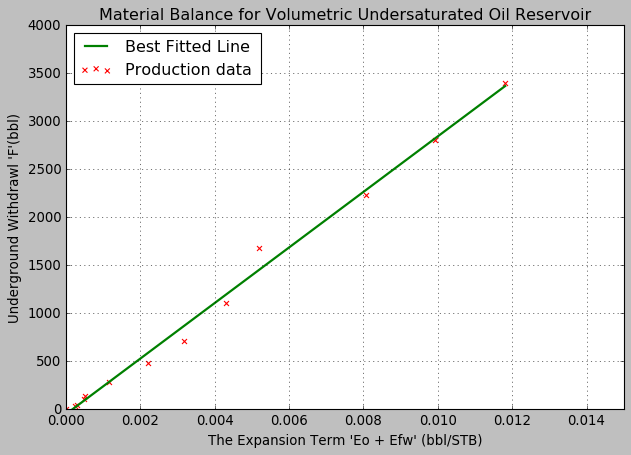

In [102]:
plt.style.use('_classic_test')
plt.figure(figsize = (9,6))
plt.scatter(x,y,marker = 'x',color = 'red',label = "Production data")
plt.plot(x,df["F(Mbbl)_Fit"], label = "Best Fitted Line ", color = 'green', lw = 2)

plt.xlim(0,0.015)
plt.ylim(0,4000)
plt.xlabel("The Expansion Term 'Eo + Efw' (bbl/STB)")
plt.ylabel("Underground Withdrawl 'F'(bbl)")
plt.title("Material Balance for Volumetric Undersaturated Oil Reservoir")
plt.grid(True)
plt.legend(loc='best')

print("The Oil Initially in place is", model[0],"STB given by slope of the straight line")
print("Underground Withdrawl 'F'= Oil Initially in place(N)*The Expansion Term 'Eo + Efw' ")
plt.show()